In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image 
import sys

In [2]:
dir_path = "C:/Users/iris168/DATA_MERGE_NEW_rename/"
img = cv2.imread(dir_path+'cells (1).jpg')
data= [np.array(img[:,:,0].reshape(-1),dtype = 'float32')]
for i in range (2,1044):
    cell_img2_ = cv2.imread(dir_path+'cells ('+str(i)+').jpg')
    #print(cell_img2_)
    if (cell_img2_.shape == (50,50,3)):
        img2= np.array(cell_img2_[:,:,0].reshape(-1),dtype = 'float32')
        data_ = np.append(data, [img2], axis=0 )
        data = data_
    else:
        cell_img2_ = tf.image.resize_image_with_crop_or_pad(cell_img2_, 50, 50)
        sess = tf.InteractiveSession ()
        cell_img2_ = cell_img2_.eval()
        sess.close()
        img2= np.array(cell_img2_[:,:,0].reshape(-1),dtype = 'float32')
        data_ = np.append(data, [img2], axis=0 )
        data = data_

AttributeError: 'NoneType' object has no attribute 'shape'

In [3]:
data.shape

(1042, 2500)

In [4]:
def rand_batch(data,batch_size):
    np.random.shuffle(data)
    return data[0:batch_size]

In [5]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 2, 2, 1], padding = 'SAME')

def deconv2d(x, W, output_shape):
    return tf.nn.conv2d_transpose(x, W, output_shape, strides = [1, 2, 2, 1], padding = 'SAME')
def weight_variable(shape, name):
    return tf.Variable(tf.truncated_normal(shape = shape, stddev = 0.1), name)
def bias_variable(shape, name):
    return tf.Variable(tf.constant(0.1, shape = shape), name)

In [6]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape = [None, 2500])
x_origin = tf.reshape(x, [-1, 50, 50, 1])

W_e_conv1 = weight_variable([5, 5, 1, 16], "w_e_conv1")
b_e_conv1 = bias_variable([16], "b_e_conv1")
h_e_conv1 = tf.nn.relu(tf.add(conv2d(x_origin, W_e_conv1), b_e_conv1))

W_e_conv2 = weight_variable([5, 5, 16, 32], "w_e_conv2")
b_e_conv2 = bias_variable([32], "b_e_conv2")
h_e_conv2 = tf.nn.relu(tf.add(conv2d(h_e_conv1, W_e_conv2), b_e_conv2))

W_e_conv3 = weight_variable([5, 5, 32, 64], "w_e_conv3")
b_e_conv3 = bias_variable([64], "b_e_conv3")
h_e_conv3 = tf.nn.relu(tf.add(conv2d(h_e_conv2, W_e_conv3), b_e_conv3))

code_layer = h_e_conv3

W_d_conv0 = weight_variable([5, 5, 16, 64], "W_d_conv0")
b_d_conv0 = bias_variable([1], "b_d_conv0")
output_shape_d_conv0 = tf.stack([tf.shape(x)[0], 13, 13, 32])
h_d_conv0 = tf.nn.relu(deconv2d(h_e_conv3, W_d_conv0, output_shape_d_conv0))

W_d_conv1 = weight_variable([5, 5, 16, 32], "w_d_conv1")
b_d_conv1 = bias_variable([1], "b_d_conv1")
output_shape_d_conv1 = tf.stack([tf.shape(x)[0], 25, 25, 16])
h_d_conv1 = tf.nn.relu(deconv2d(h_e_conv2, W_d_conv1, output_shape_d_conv1))

W_d_conv2 = weight_variable([5, 5, 1, 16], "w_d_conv2")
b_d_conv2 = bias_variable([16], "b_d_conv2")
output_shape_d_conv2 = tf.stack([tf.shape(x)[0], 50, 50, 1])
h_d_conv2 = tf.nn.relu(deconv2d(h_d_conv1, W_d_conv2, output_shape_d_conv2))

x_reconstruct = h_d_conv2
print("reconstruct layer shape : %s" % x_reconstruct.get_shape())

reconstruct layer shape : (?, 50, 50, 1)


In [7]:
print("x_origin",x_origin)
print("W_e_conv1",W_e_conv1)
print("h_e_conv1",h_e_conv1)
print("W_e_conv2",W_e_conv2)
print("h_e_conv2",h_e_conv2)
print("W_e_conv3",W_e_conv3)
print("h_e_conv3",h_e_conv3)
print("code layer shape : %s" % h_e_conv3.get_shape())
print("W_d_conv0",W_d_conv0)
print("h_d_conv0",h_d_conv0)
print("W_d_conv1",W_d_conv1)
print("h_d_conv1",h_d_conv1)
print("W_d_conv2",W_d_conv2)
print("h_d_conv2",h_d_conv2)

x_origin Tensor("Reshape:0", shape=(?, 50, 50, 1), dtype=float32)
W_e_conv1 <tf.Variable 'Variable:0' shape=(5, 5, 1, 16) dtype=float32_ref>
h_e_conv1 Tensor("Relu:0", shape=(?, 25, 25, 16), dtype=float32)
W_e_conv2 <tf.Variable 'Variable_2:0' shape=(5, 5, 16, 32) dtype=float32_ref>
h_e_conv2 Tensor("Relu_1:0", shape=(?, 13, 13, 32), dtype=float32)
W_e_conv3 <tf.Variable 'Variable_4:0' shape=(5, 5, 32, 64) dtype=float32_ref>
h_e_conv3 Tensor("Relu_2:0", shape=(?, 7, 7, 64), dtype=float32)
code layer shape : (?, 7, 7, 64)
W_d_conv0 <tf.Variable 'Variable_6:0' shape=(5, 5, 16, 64) dtype=float32_ref>
h_d_conv0 Tensor("Relu_3:0", shape=(?, 13, 13, 32), dtype=float32)
W_d_conv1 <tf.Variable 'Variable_8:0' shape=(5, 5, 16, 32) dtype=float32_ref>
h_d_conv1 Tensor("Relu_4:0", shape=(?, 25, 25, 16), dtype=float32)
W_d_conv2 <tf.Variable 'Variable_10:0' shape=(5, 5, 1, 16) dtype=float32_ref>
h_d_conv2 Tensor("Relu_5:0", shape=(?, 50, 50, 1), dtype=float32)


In [8]:
w_list = [W_e_conv1,W_e_conv2,W_d_conv1,W_d_conv2]
org_loss = tf.reduce_mean(tf.pow(x_reconstruct - x_origin, 2))
regularizer = tf.reduce_sum([tf.reduce_sum(
                             tf.pow(w,2)/(1+tf.pow(w,2))) for w in w_list]) \
                            /tf.reduce_sum(
                             [tf.size(w,out_type=tf.float32) for w in w_list])
loss = org_loss+regularizer
optimizer = tf.train.RMSPropOptimizer(0.01).minimize(loss)
init_op = tf.global_variables_initializer()

In [9]:
train_loss =[]
batch_size =30
sess = tf.InteractiveSession()
sess.run(init_op)
for i in range(10000):
    batch = rand_batch(data,batch_size)
    if i%100 == 0:
        print("step %d, loss %g"%(i, loss.eval(feed_dict={x:batch/255})))
        train_loss.append(loss.eval(feed_dict={x:batch}))
    optimizer.run(feed_dict={x:batch/255})
    
print("final loss %g" % loss.eval(feed_dict={x:data/255}))

step 0, loss 0.252051
step 100, loss 0.273572
step 200, loss 0.0641257
step 300, loss 0.0100728
step 400, loss 0.0323577
step 500, loss 0.0437433
step 600, loss 0.0237267
step 700, loss 0.0330612
step 800, loss 0.0289745
step 900, loss 0.0237097
step 1000, loss 0.0102549
step 1100, loss 0.00998692
step 1200, loss 0.0225049
step 1300, loss 0.0172086
step 1400, loss 0.00481732
step 1500, loss 0.0134577
step 1600, loss 0.00356907
step 1700, loss 0.0229604
step 1800, loss 0.0114701
step 1900, loss 0.00376843
step 2000, loss 0.0249077
step 2100, loss 0.00623229
step 2200, loss 0.00594169
step 2300, loss 0.00427009
step 2400, loss 0.00775314
step 2500, loss 0.0222057
step 2600, loss 0.00725709
step 2700, loss 0.0199341
step 2800, loss 0.0124463
step 2900, loss 0.011954
step 3000, loss 0.00662603
step 3100, loss 0.00977665
step 3200, loss 0.0168251
step 3300, loss 0.0184179
step 3400, loss 0.00955657
step 3500, loss 0.00816025
step 3600, loss 0.00698696
step 3700, loss 0.0124073
step 3800, lo

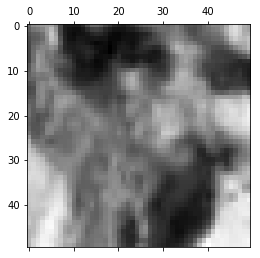

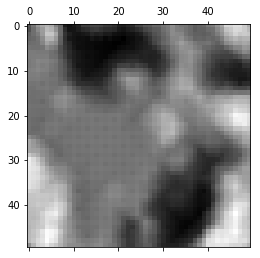

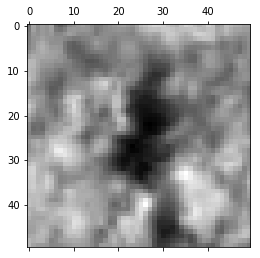

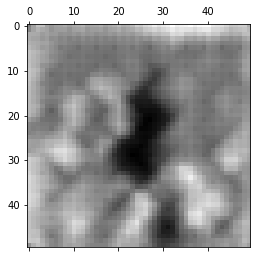

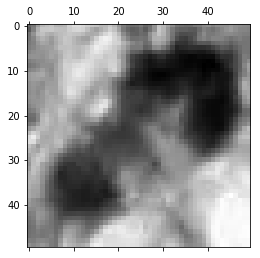

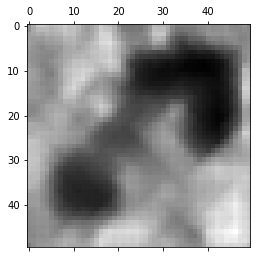

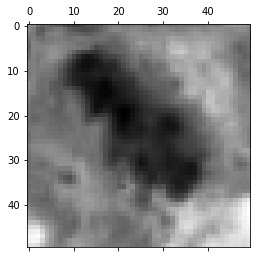

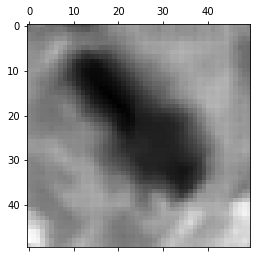

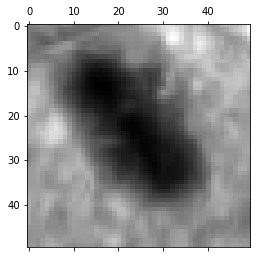

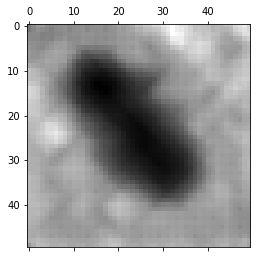

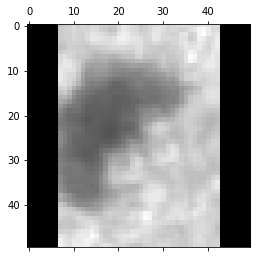

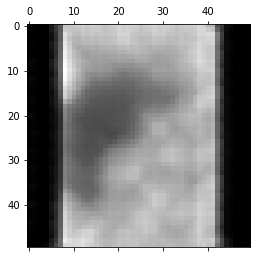

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

output_nd = x_reconstruct.eval(feed_dict = {x:data/255})
for i in [1 , 100, 17, 24, 36, 300]:
    curr_img = np.reshape(data[i, :], (50, 50)) 
    ae_img = np.reshape(output_nd[i,:]*255, (50, 50))
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.matshow(ae_img, cmap=plt.get_cmap('gray'))

In [11]:
import math
def plot_conv_layer(layer, image, num_filters):
    output = sess.run(layer, feed_dict = {x: [image]})
    
    num_grids = int(math.ceil(math.sqrt(num_filters)))
    
    fig, axes = plt.subplots(num_grids, num_grids)
    
    for i, ax in enumerate(axes.flat):
        if i < num_grids * num_grids:
            img = output[0, :, :, i]
            ax.imshow(img, interpolation='nearest', cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

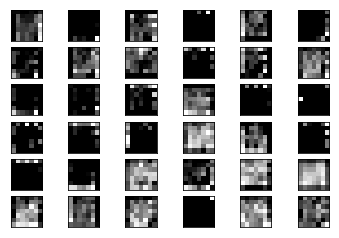

In [12]:
num_filters = 32
plot_conv_layer(code_layer, data[1], num_filters)

In [13]:
code = sess.run(code_layer, feed_dict={x:data})

In [14]:
code_ = sess.run(code_layer, feed_dict={x:data})

In [15]:
code.shape

(1042, 7, 7, 64)

In [16]:
code = code.reshape(-1,3136)

In [20]:
code_[0].shape

(7, 7, 64)

In [22]:
a=code_[0].reshape(-1,3136)

In [23]:
a

array([[-0.     , -0.     , -0.     , ..., -0.     , 23.66462, -0.     ]],
      dtype=float32)

In [18]:
code[0]

array([-0.     , -0.     , -0.     , ..., -0.     , 23.66462, -0.     ],
      dtype=float32)

In [21]:
code[0].shape

(3136,)

In [24]:
code.shape

(1042, 3136)

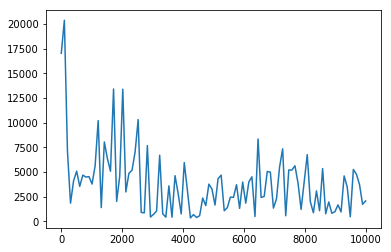

In [25]:
x = np.linspace(0,10000,100)
plt.plot(x,train_loss)

In [26]:
Score=np.loadtxt("C:/Users/iris168/DATA_MERGE_NEW_rename/Score.txt")

In [27]:
labels = [0]
dir_path = "C:/Users/iris168/DATA_MERGE_NEW_rename/"
for i in range (2,1043):
    if (Score[:,2][i-1] < Score[:,2].min()+35):
        labels.append(0)
    elif (Score[:,2][i-1] > Score[:,2].max()-35):
        labels.append(1)
    else:
        labels.append(2)

In [28]:
len(labels)

1042

In [29]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [30]:
def plot_scatter(x, labels, title, txt = False):
    plt.title(title)
    ax = plt.subplot()
    ax.scatter(x[:,0], x[:,1], c = labels)
    txts = []
    if txt:
        for i in range(10):
            xtext, ytext = np.median(x[labels == i, :], axis=0)
            txt = ax.text(xtext, ytext, str(i), fontsize=24)
            txt.set_path_effects([
                PathEffects.Stroke(linewidth=5, foreground="w"),
                PathEffects.Normal()])
            txts.append(txt)
    plt.show()

In [31]:
def pca(X, n_components):
    pca = PCA(n_components = n_components)
    pca.fit(X)
    return pca.transform(X)

In [32]:
def tsne(X, n_components):
    model = TSNE(n_components=2, perplexity=40)
    return model.fit_transform(X)

In [33]:
test_layer3_pca = pca(code, 2)

C:\Users\iris168\.conda\envs\tensorflow_gpu\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


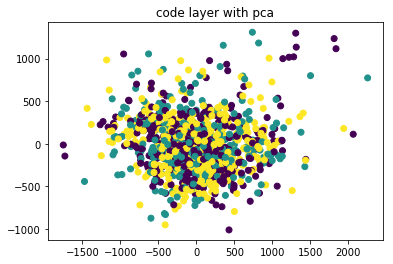

In [34]:
plot_scatter(test_layer3_pca, labels, "code layer with pca")

C:\Users\iris168\.conda\envs\tensorflow_gpu\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


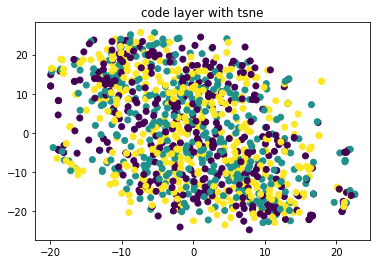

In [36]:
layer1_pca = pca(code, 50)
layer1_tsne = tsne(layer1_pca, 2)
plot_scatter(layer1_tsne, labels, "code layer with tsne")

In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels

In [38]:
def plot_train(bdt_discrete,bdt_real):
    n_trees_discrete = len(bdt_discrete)
    n_trees_real = len(bdt_real)

    # Boosting might terminate early, but the following arrays are always
    # n_estimators long. We crop them to the actual number of trees here:
    discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
    real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
    discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.plot(range(1, n_trees_discrete + 1),
             discrete_test_errors, c='black', label='SAMME')
    plt.plot(range(1, n_trees_real + 1),
             real_test_errors, c='black',
             linestyle='dashed', label='SAMME.R')
    plt.legend()
    plt.ylim(0.18, 0.62)
    plt.ylabel('Test Error')
    plt.xlabel('Number of Trees')

    plt.subplot(132)
    plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
             "b", label='SAMME', alpha=.5)
    plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
             "r", label='SAMME.R', alpha=.5)
    plt.legend()
    plt.ylabel('Error')
    plt.xlabel('Number of Trees')
    plt.ylim((.2,
             max(real_estimator_errors.max(),
                 discrete_estimator_errors.max()) * 1.2))
    plt.xlim((-20, len(bdt_discrete) + 20))

    plt.subplot(133)
    plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
             "b", label='SAMME')
    plt.legend()
    plt.ylabel('Weight')
    plt.xlabel('Number of Trees')
    plt.ylim((0, discrete_estimator_weights.max() * 1.2))
    plt.xlim((-20, n_trees_discrete + 20))

    # prevent overlapping y-axis labels
    plt.subplots_adjust(wspace=0.25)
    plt.show()

In [39]:
def plot_train_error(AdaBoostClassifier1,AdaBoostClassifier2):
    n_trees_discrete = len(bdt_discrete)
    n_trees_real = len(bdt_real)

    # Boosting might terminate early, but the following arrays are always
    # n_estimators long. We crop them to the actual number of trees here:
    discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
    real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
    discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.plot(range(1, n_trees_discrete + 1),
             discrete_test_errors, c='black', label='SAMME')
    plt.plot(range(1, n_trees_real + 1),
             real_test_errors, c='black',
             linestyle='dashed', label='SAMME.R')
    plt.legend()
    plt.ylim(0.18, 0.62)
    plt.ylabel('Test Error')
    plt.xlabel('Number of Trees')

    plt.subplot(132)
    plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
             "b", label='SAMME', alpha=.5)
    plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
             "r", label='SAMME.R', alpha=.5)
    plt.legend()
    plt.ylabel('Error')
    plt.xlabel('Number of Trees')
    plt.ylim((.2,
             max(real_estimator_errors.max(),
                 discrete_estimator_errors.max()) * 1.2))
    plt.xlim((-20, len(bdt_discrete) + 20))

    plt.subplot(133)
    plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
             "b", label='SAMME')
    plt.legend()
    plt.ylabel('Weight')
    plt.xlabel('Number of Trees')
    plt.ylim((0, discrete_estimator_weights.max() * 1.2))
    plt.xlim((-20, n_trees_discrete + 20))

    # prevent overlapping y-axis labels
    plt.subplots_adjust(wspace=0.25)
    plt.show()

In [40]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [41]:
n_split = 900
data_train, data_test = code[:n_split], code[n_split:]
labels_train, labels_test = labels[:n_split], labels[n_split:]

In [42]:
# Training SAMME & SAMME.R
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3),
    n_estimators=500,
    learning_rate=1)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3),
    n_estimators=500,
    learning_rate=1.5,
    algorithm="SAMME")

bdt_real.fit(data_train, labels_train)
bdt_discrete.fit(data_train, labels_train)

real_test_errors = []
discrete_test_errors = []
# Stage wise training for analysiing how it work
for real_test_predict, discrete_train_predict in zip(
        bdt_real.staged_predict(data_test), bdt_discrete.staged_predict(data_test)):
    real_test_errors.append(
        1. - accuracy_score(real_test_predict, labels_test))
    discrete_test_errors.append(
        1. - accuracy_score(discrete_train_predict, labels_test))

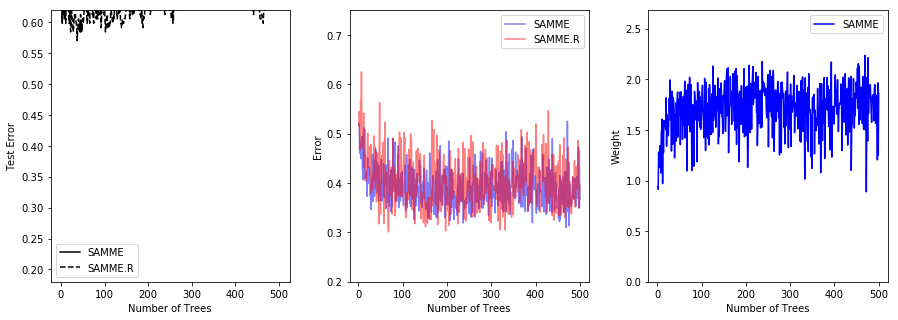

In [43]:
plot_train(bdt_discrete,bdt_real)

Confusion matrix, without normalization
[[12 20 15]
 [14 15 10]
 [12 20 24]]
Normalized confusion matrix
[[0.25531915 0.42553191 0.31914894]
 [0.35897436 0.38461538 0.25641026]
 [0.21428571 0.35714286 0.42857143]]


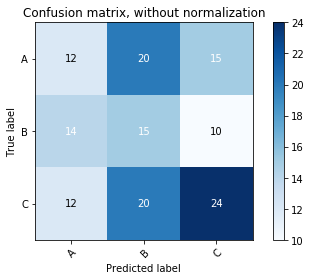

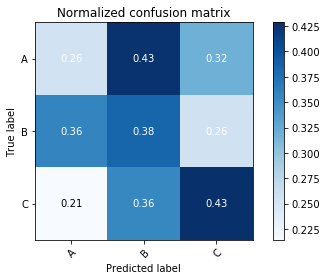

In [44]:
y_true = labels_test
y_pred = bdt_real.predict(data_test)
confusion_matrix(y_true, y_pred)
# Plot SAMME.R non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=['A','B','C','D','E'],
                      title='Confusion matrix, without normalization')

# Plot SAMME.R normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=['A','B','C','D','E'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[ 9 18 20]
 [10 11 18]
 [16 29 11]]
Normalized confusion matrix
[[0.19148936 0.38297872 0.42553191]
 [0.25641026 0.28205128 0.46153846]
 [0.28571429 0.51785714 0.19642857]]


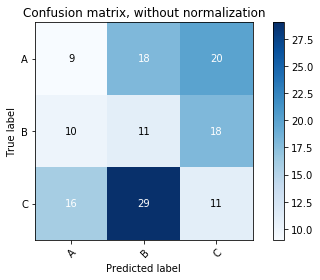

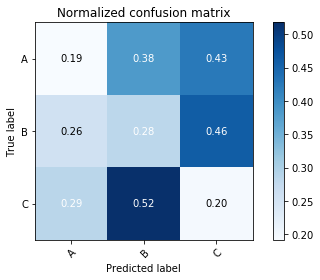

In [45]:
y_true = labels_test
y_pred = bdt_discrete.predict(data_test)
confusion_matrix(y_true, y_pred)
# Plot SAMME non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=['A','B','C','D','E'],
                      title='Confusion matrix, without normalization')

# Plot SAMME normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=['A','B','C','D','E'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()